<font size="1"> *This notebook is best viewed in jupyter lab/notebook. You may also choose to use Google Colab but some parts of the images/colouring will not be rendered properly.</font> 

<div class="alert alert-block alert-warning">

# <p style="text-align: center;">Lab 3 (Weeks 6,7): Multi-Layer Perceptrons (MLP) </p>

<center><img src="https://viso.ai/wp-content/uploads/2021/04/multilayer-perceptrons-MLP-concept-1.jpg" width="400" height="200" /></center>

<!-- ![linear-vs-logistic-regression--medium](https://miro.medium.com/max/1400/1*dm6ZaX5fuSmuVvM4Ds-vcg.jpeg) -->

Welcome to your third lab of ECE4179! Labs in this unit will run as a help desk and they are not mandatory to attend.

The two notebooks provided contain all the code and comments that you need to submit. Feel free to add in your own markdown for additional comments. After completion, You need to submit both Jupyter Notebooks (.ipynb file) to Moodle. Make sure you run the Notebooks before submitting and all outputs are visible.

In this Lab, you will find three tasks distributed across two notebooks: COVID and FashionMNIST. These tasks will guide you through to learn using a deep learning framework (Pytorch lightning) for MLP based problems. These knowledge and skills will be essential for lab 4 and assignment, and in general, critical to get you prepared to enter the deep learning world.

- <b>Task 1:</b> MLP for classifying COVID-19
- <b>Task 2:</b> Anaylse and Visualisation
- <b>Task 3:</b> MLP for multiclass classification of the FasionMNIST dataset

Each task will contain code to complete, and worded questions, so ensure you complete both before submitting.

Good luck with the Lab! Submit it before the deadline to enjoy full marks.

__Submission details:__
- __Make sure you have run all your cells from top to bottom (you can click _Kernel_ and _Restart Kernel and Run All Cells_).__ </br>
- __Submit the Jupyter Notebooks (_Lab_3_Task1_2_COVID.ipynb_) and (_Lab_3_Task3_FashionMNIST.ipynb_).__
- __Outputs must be visible upon submission. We will also be re-running your code__

<b>Enter your student details below</b>

- <b>Student Name:</b> Alexander Li
- <b>Student ID:</b> 30630711

<div class="alert alert-block alert-danger">

## Table of Contents

* [Pytorch & Pytorch-Lightning Installation](#installization)

* [Task 1:  MLP for classifying COVID-19](#task1)
    * [1.1 Data: Create custom dataset and dataloaders](#1_1)
    * [1.2 Custom Class Creation based on ImageFolder](#1_2)
    * [1.3 Model: Design Shallow MLP model](#1_3)
    * [1.4 Train & Evaluate: Train and evaluate model's performance](#1_4)

* [Task 2: Analysing convergence and accuracy](#task2)
    * [2.1 Loss and Accuracy](#2_1)
    * [2.2 Confusion Matrix](#2_2)


<div class="alert alert-block alert-warning">

# Before you begin

We have provided some numerical answers for you to aim for. To replicate these results, do not change any of the codes that are labelled "Do not change".

Throughout this lab, there will be code and written answers that you need to fill in / complete. Please read the instructions carefully. The comments in the code snippet and markdown text will guide you on what you need to do.


<div class="alert alert-block alert-warning">

## Pytorch & Pytorch-Lightning Installation <a class="anchor" id="installization"></a>

What are the differences between PyTorch and PyTorch-Lightning?

PyTorch and PyTorch-Lightning exhibit distinct differences in their functionalities and use cases.

PyTorch is a deep learning library founded on the Torch framework and adapted for Python. It provides an environment that offers enhanced control over the design of neural network architectures. In contrast to other deep learning frameworks like TensorFlow or Keras, PyTorch empowers users with greater flexibility in customizing hyperparameters, loss functions, and various other aspects of their models.

On the other hand, PyTorch-Lightning operates at a higher level of abstraction compared to the original PyTorch. This higher-level framework simplifies the process of working with and executing models. It comes equipped with pre-built methods and classes that handle various tasks, alleviating the need for users to manage certain complexities. For example, PyTorch-Lightning automatically manages aspects such as GPU utilization and data loading. As a result, code written using PyTorch-Lightning tends to be more concise and streamlined, making it appear simpler when compared to equivalent code in standard PyTorch.



In [38]:
# If you have not installed pytorch-lightning already, then please follow the instructions below

# # If you run on Jupyter Lab uncomment below comment
# ! pip install --quiet "matplotlib" "pytorch-lightning" "pandas" "torchmetrics" "torchvision"

# # If you run on google colab uncomment below comment
# ! pip install pytorch-lightning -qq

In [39]:
## Some standard libraries

import numpy as np # Numpy is the fundamental building block of understanding tensor (matrices) within Python
import matplotlib.pyplot as plt # Matplotlib.pyplot is the graphing library that we will be using throughout the semester
import random # Useful for sampling


<div class="alert alert-block alert-info">

# Task 1 - MLP for classifying COVID-19 <a class="anchor" id="task1"></a>


In this section, we will train a Shallow MLP model for classifying a COVID chest X-ray dataset that contains images and labels for training, validation and test purposes.


#### In this task, you will work on the following points:
 1. Create training, validation and testing dataloaders. Visualize some images from the training dataset.

 2. Design the Shallow MLP model using PyTorch Lightning Module.

 3. Train the MLP model. Record relevant results.

 4. Visualize experimental results and predictions.

<div class="alert alert-block alert-info">

## Learning Objective

This task aims to understand and implement simple MLP model to train neural networks on COVID-19 dataset. By the end of this task, you will be able to:
    
1. Load and prepare the COVID-19 dataset using PyTorch Lightning.

2. Implement a Multi-Layer Perceptron (MLP) model for binary classification using PyTorch Lightning's framework.

3. Apply stochastic gradient descent (SGD) optimization method to train the MLP model on the COVID-19 dataset.

<div class="alert alert-block alert-info">

## 1.1 Data: Create custom dataset and dataloaders <a class="anchor" id="1_1"></a>

In the PyTorch framework, two essential classes greatly simplify the training process: **Dataset** ([```torch.utils.data.Dataset```](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset)) and **Dataloader** ([```torch.utils.data.DataLoader```](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)). The Dataset class stores individual samples along with their corresponding labels, while the Dataloader class constructs an iterable that wraps around the Dataset, thus facilitating convenient access to the samples. For a comprehensive understanding of data management in PyTorch, you can refer to [this page](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html).

In essence, a **Dataset** object loads raw data and offers seamless access to each sample, which encompasses both the sample data and its associated label. Subsequently, a **Dataloader** object takes the Dataset instance and assembles batches of data, thereby streamlining the process of model training and testing.

In the following section, we will create our own Dataset and Dataloader. These components will play a pivotal role in managing the COVID-19 dataset and will be leveraged for accomplishing Tasks 1 and 2.

<div class="alert alert-block alert-info">

**Important:** Before you begin, make sure you have unzipped the 'covid19_xray.zip' file and the unzipped folder "covid19_xray" is directly under the "data" folder.

In order to load datasets, we will use torchvision module and to create a dataloader, we will use sub module of torch as follows.

**from torch.utils.data import DataLoader**

Under torchvision datasets you can find popular datasets that are frequently used for machine learning/deep learning tasks (eg., MNIST, SVHN, CIFAR10, CIFAR100 etc). You can create your own custom dataset using torchvision dataset in built functionalities and in this task we will show how to load custom datasets.

In [40]:
# ================================================
# Do not change this code!
# ================================================

from torch import optim # Optimizer module1 
from torch.utils.data import DataLoader, random_split # Under torchvision datasets you can find popular datasets that are frequently used for machine learning/deep learning tasks (eg., MNIST, SVHN, CIFAR10, CIFAR100 etc).
from torch.utils.data.dataset import Dataset # You can create your own custom dataset using torchvision dataset in-built functionalities.
import torchvision # Torchvision is a library that contains popular datasets, model architectures, and image transformations for computer vision tasks
from pytorch_lightning import seed_everything # This package is used to set the global seed for everything

# Setting seeds for reproducibility
seed_everything(4179)
random.seed(4179)
np.random.seed(4179)

Global seed set to 4179


**Defining Transforms Using the torchvision Library**

In this lab, the incorporation of transforms into the dataset is introduced. This topic is covered in the lab videos, and the [here](https://pytorch.org/vision/stable/transforms.html) is the corresponding PyTorch documentation on transforms.

The ```torchvision.transforms``` module provides us a range of convenient transform functions that facilitate effortless manipulation of image samples. These transformations encompass operations such as resizing, color modification, datatype conversion, and more. By further employing ```transforms.Compose()```, we can amalgamate multiple transforms into a singular sequence. To obtain a more comprehensive understanding of data transformation, you may check the [PyTorch transform class](https://pytorch.org/vision/0.9/transforms.html).

For this lab task, we are going to use transforms to:
- Resize the image
- Convert it to grayscale (yielding a single-channel image)
- Convert it into a tensor
- Normalize the pixel intensity (It is very useful to apply transforms so that all the images are standardised so that your model can run effectively!)

Don't worry too much, you are not required to implement this concept in this lab. However, it is advisable to familiarize yourself with the concept and its implementation, as it will be critical for lab 4 and the assignment later on.

You should NOT have to change the following block of code, but read through it carefully to understand how it works.

In [41]:
# ================================================
# Do not change these settings!
# ================================================

from torchvision import transforms

data_mean = [0.485]
data_std = [0.229]
# data transform without data augmentation
data_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.Grayscale(),
    transforms.ToTensor(),
    transforms.Normalize(data_mean, data_std)
])

# ================================================
# Do not change these settings!
# ================================================

**(a) We first create train/val/test dataloaders.**

As the first excersize, we directly load the images from the folders using the build in torchvision function ([```torchvision.datasets.ImageFolder```](https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html)). We can do this because we already have the COVID-19 dataset downloaded.

Later in this task, we'll develop a specialized class using the `ImageFolder`. Additionally, in Task 3, we'll introduce an alternative approach for loading the data.

If you inspect the dataset we have, there are two sets of data - train and test. We'll need to split the images in the train folder into 'train' and 'validation' sets. This can be done using the [```random_split```](https://pytorch.org/docs/stable/data.html) function imported above.

In [42]:
# Use ImageFolder to read in the data. Apply the default data_transform we have already defined
train_set = torchvision.datasets.ImageFolder("data\\covid19_xray\\train", data_transform)

# Split the train set into training and validation. Normal to use a 80-20 split.
train_size = int(len(train_set)*0.8)
val_size = int(len(train_set)) - train_size
trainset, valset = random_split(train_set, [train_size, val_size])
testset = torchvision.datasets.ImageFolder("data\\covid19_xray\\test", data_transform)

# Sanity check to see the size of the datasets.
print(f'Train set has {len(trainset)} images')
print(f'Validation set has {len(valset)} images')
print(f'Testing set has {len(testset)} images')

# Define a batch size of 16 for trian/val/test dataloader
BATCH_SIZE = 16

# Create the dataloader for each dataset
trainloader = DataLoader(trainset, shuffle=True, batch_size=BATCH_SIZE, num_workers=0, pin_memory=False) 
valloader = DataLoader(valset, shuffle=False, batch_size=BATCH_SIZE, num_workers=0, pin_memory=False) 
testloader = DataLoader(testset, shuffle=False, batch_size=BATCH_SIZE, num_workers=0, pin_memory=False) 

Train set has 108 images
Validation set has 28 images
Testing set has 40 images


Let's **iterate** through the dataloaders you just created to check the dimensions.

In [43]:
# Print the class labels and the loaders
dataloaders = {"trainloader": trainloader, "valloader": valloader, "testloader": testloader}
print(f'class id: {train_set.class_to_idx}')

# Iterate through the dataloaders dictionary and print the shape of the tensor image for each dataloader.
# i.e., print out the images batch shape of each dataloader.
for key in dataloaders.keys():
    iterable = iter(dataloaders[key])
    data, labels = next(iterable)
    print(f"{key} input data shape: {data.shape}")
    print(f"{key} target data shape: {labels.shape}")

class id: {'NORMAL': 0, 'PNEUMONIA': 1}
trainloader input data shape: torch.Size([16, 1, 64, 64])
trainloader target data shape: torch.Size([16])
valloader input data shape: torch.Size([16, 1, 64, 64])
valloader target data shape: torch.Size([16])
testloader input data shape: torch.Size([16, 1, 64, 64])
testloader target data shape: torch.Size([16])


**(b) Lets visualize what the mini-batches will give us in the training dataloader.**

You may find the fucntion [```torchvision.utils.make_grid```](https://pytorch.org/vision/main/generated/torchvision.utils.make_grid.html) useful

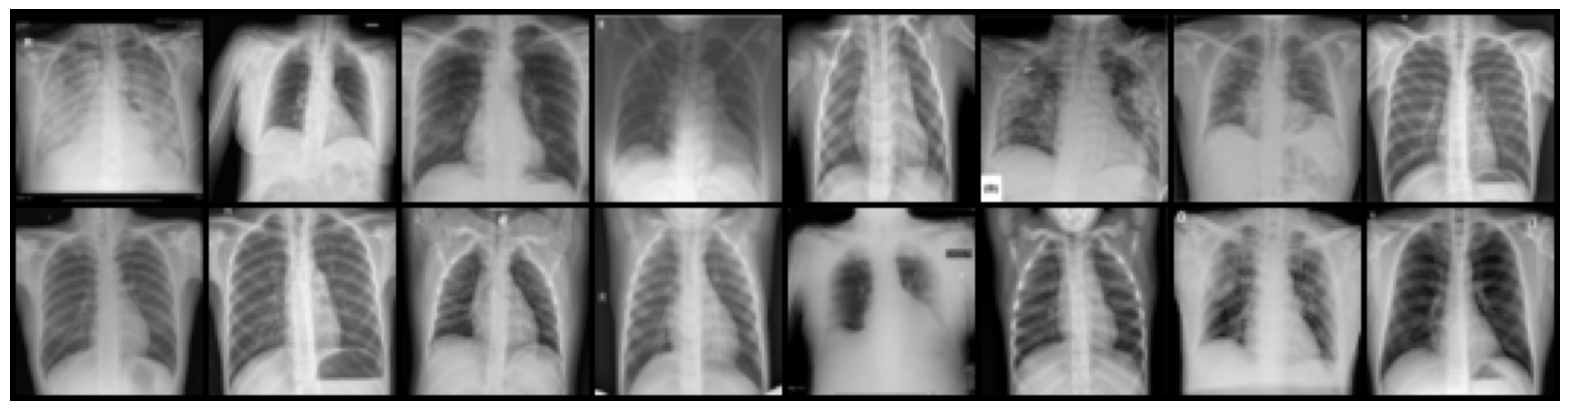

In [44]:
# The resolution of the resized images is 64 x 64
img_resolution = 64

# We can create an iterater using the dataloaders and take a random sample
images, labels = next(iter(dataloaders["trainloader"]))

# You may need to reshape the images batch to 16 x 1 x 28 x 28
# images = ???

# Visualize dataset using torchvision grid
plt.figure(figsize = (20,10))
plt.axis('off')
out = torchvision.utils.make_grid(images, nrow=8, normalize=True)
plt.imshow(out.numpy().transpose((1, 2, 0)))

<div class="alert alert-block alert-info">

## 1.2 Custom Class Creation based on ImageFolder <a class="anchor" id="1_2"></a>
    
In this section, you will be creating a customized Dataset class and a corresponding Dataloader. These components are designed to effectively manage three distinct outputs, namely feature maps, labels, and the original input images. Subsequently, in section 1.3, you will be training a MLP using feature maps that have been derived from the provided checkpoint. Consequently, the customized Dataset class you develop should be capable of furnishing these three crucial pieces of information. The key steps in this process are as follows:

- Commence by initializing the procedure by loading pretrained weights for the specified Simple CNN model.
- Progress to the creation of a custom dataset class. This involves building upon the foundation provided by the ImageFolder structure.
- Formulate innovative dataloaders that are tailored to the specifications of the freshly devised dataset class.

Below are some critical libraries that is involved in the training process. The ones that are different to previous labs are the __torch__, __torchmetrics__, and __pytorchlightning__. For more information, read the comments for each library import below, or search online and have a read of their documentations.


Please do not change code block below.

In [45]:
# ================================================
# Do not change this code!
# ================================================

import os # Useful for running command line within python
import pandas as pd ## Useful for data manipulation
from IPython.display import Image ## For markdown purposes
from IPython.display import clear_output

import torch ## Pytorch is the deep learning library that we will be using
import torch.nn as nn # Neural network module
import torch.nn.functional as F ## Functional module
import torchmetrics ## Torchmetrics is a library that contains metrics for evaluating models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from torchvision.datasets.folder import ImageFolder
from torchvision.datasets.folder import default_loader

import pytorch_lightning as pl ## Pytorch lightning is a wrapper for pytorch that makes it easier to train models
from pytorch_lightning.loggers import CSVLogger
from pytorch_lightning.callbacks import Callback, ModelCheckpoint
from pytorch_lightning.callbacks.progress import TQDMProgressBar

# Setting seeds for reproducibility
seed_everything(4179)

from torch.nn import Conv2d, ReLU, Sequential

# ================================================
# Do not change this code!
# ================================================

Global seed set to 4179


<h3>A Pytorch CNN model</h3>

Here we define the structure of a Pytorch CNN model, which will be used before we move on to our Shallow MLP.

To do so, here we need to use the Pytorch `torch.nn.Module` class as the base for defining your network. The two basic functions that we need to override are \_\_init__() and forward().

As the first step, begin by reviewing the provided code for the SimpleCNN model. This model is a basic convolutional neural network with two convolutional layers, each followed by a ReLU activation function. 

In [46]:
# ================================================
# Do not change this code!
# ================================================

# Simple CNN Model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 5, kernel_size=(5,5), stride=2)
        self.conv2 = nn.Conv2d(5, 10, kernel_size=(3,3), stride=1)
        self.relu1 = ReLU()
        self.relu2 = ReLU()
        self.conv = Sequential(self.conv1, self.relu1, self.conv2, self.relu2)
        
    def forward(self, x):
        x = self.conv(x)
        return x

# ================================================
# Do not change this code!
# ================================================

<div class="alert alert-block alert-info">

Now you might be wondering, isn't the lab about MLPs?!? Why are we touching on CNNs here? And you would be right!

Multi-Layer Perceptrons (MLPs) are conventionally employed for processing 1-dimensional data or, in the context of image data, for performing classification after the extraction of features. Given that we are working with image data (which can be considered as 2-dimensional data when utilizing grayscale images), it is more appropriate to employ other tools at the initial stages for feature extraction. In this specific scenario, a pre-trained Convolutional Neural Network (CNN) will be utilized to extract features from the dataset. You may choose to ignore the details of the CNN, but it would be beneficial for later assessments.

The output obtained from the CNN, known as the feature map, can subsequently be reshaped into a 1-dimensional format. This transformation enables the MLP to effectively weigh all the extracted features before executing binary classification on the images. This sequential approach facilitates optimal utilization of the features extracted by the CNN, ultimately contributing to enhanced classification performance.

We do this because the raw image data here have a relatively high resolution. If the images are small enough, we could still directly flatten the 2-dimensional images to 1-dimension for the MLP.

Now, let's load a pre-trained CNN in that will be used for this dataset.

**(a) Load Pre-trained weights**

Now, what is a pre-trained model? A pre-trained model is a model that has been trained on a similar task but we are now using the weights of the pre-trained model to apply it to another task! How does that work? 

As mentioned previously, CNNs are useful for feature extraction. Once we train a CNN model on an initial dataset, the learned features can be reused for a similar dataset. Let's say we trained a model to classify different types of trains. We can use the features learned from trains to classify different types of cars as well. This means we can use the pre-trained model to extract features from raw input data (i.e., preprocess the raw data) and use those features as new input data to train a classifier.

The image below depicts this well

<center> <img src="img/Lab3_Architecture.png" alt="Drawing" style="width: 1000px;"/> </center>
<center> The image credit goes to another person not involved with the creation of the lab</center>

All that aside, let's load given pretrained weights into the CNN model. Use functions like `load_state_dict` to load pretrained weights from a file (`Task1_CNN.pt`), you may find [this link](https://pytorch.org/tutorials/beginner/saving_loading_models.html) useful.

In [47]:
# Create an instance of the SimpleCNN model
pretrained_CNN = SimpleCNN()

# Load the pretrained weights
pretrained_CNN.conv.load_state_dict(torch.load("Task1_CNN.pt"))

<All keys matched successfully>

**(b) Create Custom CovidDataset class**

All the required modules for the next step are imported for you: `from torchvision.datasets import ImageFolder` and `from torchvision.datasets.folder import default_loader`.

Create the CovidDataset class implementation that returns the feature map of the input image, along with its corresponding ground truth label and the original input image. The original input image is included for future reference. We will use the `torchvision.datasets.ImageFolder` as the parent class and only override the \_\_getitem__() function to process each raw image sample using the pre-trained CNN.

You may also want to check [this link](https://pytorch.org/docs/stable/generated/torch.no_grad.html) for the `no_grad()` which will be used.

In [48]:
# Define the CovidDataset class that inherits from ImageFolder.
class CovidDataset(ImageFolder):
    # In the __init__ method, call the parent class constructor using super().__init__(root, transform=transform, loader=loader).
    # Add an additional parameter CNN to the constructor. 
    def __init__(self, root: str, transform=None, loader=default_loader, CNN=None):
        super().__init__(root, transform=transform, loader=loader)
        self.CNN = CNN

    def __getitem__(self, index: int):

        # Get the image path and the image label pair using the index
        path, target = self.imgs[index]
        
        # load the image from the path using self.loader
        sample = self.loader(path)

        # If a transformation is provided, apply it to the loaded image 
        if self.transform is not None:
            sample = self.transform(sample)

        # If a pretrained CNN model is provided, pass the image through the CNN to extract features. 
        # Use with torch.no_grad() to disable gradient computation during inference.
        # Return the extracted features, the target label, and the original image
        
        # If CNN model is provided, return the feature map, target label and the original image
        if self.CNN is not None:
            # Pass the image through CNN to generate feature map
            with torch.no_grad():
                features = self.CNN(sample)
            return features.squeeze(), target, sample
        else:
            # This error below give you insight of what may be going wrong.
            raise ValueError("Pre-trained CNN is not provided!")

**(c) Delete exsisting variables**

Remove the existing variables related to the dataset and dataloaders, as we will utilize feature maps as inputs to train a MLP in this particular task. We need to update the dataset and loaders so they are compatible with the pre-trained CNN

In [49]:
# Remove all the dataset and dataloader variables from the task 1.1
del train_set, valset, testset, trainloader, valloader, testloader

**(d) Create Dataloaders generated from CovidDataset class**

Now lets create new dataloaders, using the same data split as above. You will notice this is nearly identical to Task 1.1, but with the additional of another input parameter to the CovidDataset class - "CNN". This is because we have inherited the base dataset class from PyTorch, and have now added a new attribute to the class.

In [50]:
# Use CovidDataset class you just wrote to read in the data and apply the defined data_transform.
train_set = CovidDataset("data\\covid19_xray\\train", transform=data_transform, CNN=pretrained_CNN)
#train_set = ImageFolder("data\\covid19_xray\\train", transform=data_transform)

# Split the train set into training and validation.
# You can use the random_split() function. 
# Let's have 80% of the train set for training and 20% for validation
train_size = int(len(train_set)*0.8)
val_size = int(len(train_set)) - train_size
train_set, val_set =  random_split(train_set, [train_size, val_size])

# Again use the CovidDataset class above to read the test file.
test_set = CovidDataset("data\\covid19_xray\\test", transform=data_transform, CNN=pretrained_CNN)

# Let's check the size of the datasets like in 1.1a.
print(f'Train set has {len(train_set)} samples')
print(f'Validation set has {len(val_set)} samples')
print(f'Testing set has {len(test_set)} samples')

# Define a batch size of 16.
BATCH_SIZE = 16

# Create Dataloaders again with features generated from pre-trained CNN model.
trainloader = DataLoader(train_set, shuffle=True, batch_size=BATCH_SIZE, num_workers=0, pin_memory=False) 
valloader = DataLoader(val_set, shuffle=True, batch_size=BATCH_SIZE, num_workers=0, pin_memory=False) 
testloader = DataLoader(test_set, shuffle=True, batch_size=BATCH_SIZE, num_workers=0, pin_memory=False) 

# Print the class labels and the loaders
dataloaders = {"trainloader": trainloader, "valloader": valloader, "testloader": testloader}

# Iterate through the dataloaders dictionary and print the shape of the tensor feature map for each dataloader.
# i.e., print out the feature maps batch shape of each dataloader.
for key in dataloaders.keys():
    iterable = iter(dataloaders[key])
    features, target, sample = next(iterable)
    print(f"{key} feature data shape: {features.shape}")
    #print(f"{key} target data shape: {target.shape}")

Train set has 108 samples
Validation set has 28 samples
Testing set has 40 samples
trainloader feature data shape: torch.Size([16, 10, 28, 28])
valloader feature data shape: torch.Size([16, 10, 28, 28])
testloader feature data shape: torch.Size([16, 10, 28, 28])


<div class="alert alert-block alert-info">

## 1.3 Model: Design Shallow MLP <a class="anchor" id="shallow_mlp"></a>

The entire architecture that will be implemented by the end of the lab is as follows:

- Start off with a 64x64x1 grayscale image
- Pass it through a pre-trained CNN **(you do not have to worry about this)**
- From the output of the CNN, you will train a MLP based on the extracted CNN features
- At the output of the MLP, you will perform classification on the dataset

The architecture has been shown in Task 1.2.

<div class="alert alert-block alert-info">

Now let's design a Shallow MLP with **one hidden layer** and the **ReLU** activation function using the PyTorch Lightning module. The model structure is given below:

fc1 : Linear(7840 $\times$ n) $\rightarrow$ ReLU $\rightarrow$ fc2 : Linear(n $\times$ 2)

Now, the reason why we have _7840 $\times$ n_ is because MLP only deals with 1-dimensional data, so you need to reshape the final convolutional layer into one dimension, hence _7840 = 28 $\times$ 28 $\times$ 10_. The _n_ represents the number of neurons we want within the fully connected (MLP) layer.

We are going to use the **cross entropy loss** for our model training - [```nn.CrossEntropyLoss()```](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html), and evaluate the model performance according to the accuracy score - [```torchmetrics.Accuracy()```](https://torchmetrics.readthedocs.io/en/stable/classification/accuracy.html).

All models created in PyTorch Lightning need to inherit the parent class **pytorch_lightning.LightningModule**, check [this link](https://lightning.ai/docs/pytorch/stable/common/lightning_module.html) for a starter example for creating custom models using PyTorch Lightning. There are two basic functions: \_\_init__() and forward().

- In \_\_init__(), we can define the hyperparameters, the shape of each layer, etc. Same as in all python classess, this function will be called when a new instance is made.
  
- In forward(), we define the forward propagation for the model. This method is called by the object to do forward pass.

Other core functions include:

- training_step() - one complete training step that takes one batch as input, and returns a loss value at the end.

- validation_step() - one complete validation step that takes one batch as input.

- test_step() - one complete test step that takes one batch as input.

- predict_step() - one complete prediction step that takes one batch as the input, and returns the predicted labels, the true lables and the input samples.

- configure_optimizers() - define optimizers (and learning rate schedulers if needed).

In the following task, we will define all the functions mentioned above.

<h3>Pytorch Lightning Module</h3>

Now enough reading! Let's get to work and start implementing a MLP. The hyperparameters that you will be using are as follows:

- Learning rate of 1e-2 (remember, "1e-2 is identical to the scientific notation of 10^-2)
- Loss - CrossEntropyLoss (you can use the torch.nn library that we have already imported). This will be used to calculate loss for a classification task.
- MLP - One hidden layer for the MLP. You will need to figure out how to find the size of the MLP. We recommend printing the shape of the output feature map extracted from the COVID dataset. You will also use **ReLU** as your non-linear activiation function after the hidden layer. 
- MLP - One output layer to compute the binary classification 
- Accuracy - BinaryAccuracy (you can use the torch.metrics.classification library we have imported). This will be used for calculating accuracy for a binary classification task. 
- Optimizer - SGD (you can use the torch.optim library that we have already imported)

To define a Pytorch Lightning model to be trained, here you need to use the Pytorch LightningModule class as the base for defining your network. Just like the dataset class, this class has a number of important functions.
A LightningModule is a PyTorch nn.Module and it has a few more helpful methods.

In [51]:
class Shallow_MLP(pl.LightningModule):
    def __init__(self, n, learning_rate=1e-2, traindataloader=None, valdataloader=None, testdataloader=None):
        super().__init__()
        
        # define learning rate
        self.learning_rate = learning_rate

        # define loss function (Cross entropy loss)
        self.loss_fun = nn.CrossEntropyLoss()

        # define neural layers
        self.linear1 =  nn.Linear(7840, n)
        self.linear2 =  nn.Linear(n, 2)

        # define metrics, you can use torchmetrics to define the accuracies. Define it for train, val, and test.
        # You can use the BinaryAccuracy class from torchmetrics to compute the accuracies  
        self.train_accuracy = torchmetrics.classification.BinaryAccuracy()
        self.val_accuracy = torchmetrics.classification.BinaryAccuracy()
        self.test_accuracy = torchmetrics.classification.BinaryAccuracy()

        # Define dataloaders
        self.traindataloader = traindataloader
        self.valdataloader = valdataloader
        self.testdataloader = testdataloader

    def forward(self, x):
        
        # flatten the images in the forward pass
        x = x.reshape(x.shape[0], -1)
        
        # Pass input through neural layers
        out1 = F.relu(self.linear1(x))
        out2 = self.linear2(out1)

        return out2 # return the output

    def training_step(self, batch, batch_idx):

        # Compute loss for each batch:
        # Get the three variables of each batch: feature map (x), labels (y), original image (z)
        x, y, z = batch
        # Do the prediction
        logits = self(x)
        preds = logits.argmax(1)
        # Calculate the loss
        # Apply the loss function here
        loss = self.loss_fun(logits, y)

        # Compute accuracy and update the train_accuracy
        self.train_accuracy.update(preds, y)
        
        # Record accuracy and loss
        # Calling self.log will surface up scalars for you in TensorBoard
        # You may add more logs as you think necessary
        self.log("train_loss", loss, prog_bar=True, on_step=False, on_epoch=True)
        self.log("train_acc", self.train_accuracy, prog_bar=True, on_step=False, on_epoch=True)

        # Return the loss
        return loss

    def validation_step(self, batch, batch_idx):

        # Compute loss for each batch
        x,y,z = batch
        logits = self(x)
        loss = self.loss_fun(logits, y)

        # Compute accuracy
        preds = logits.argmax(1)
        self.val_accuracy.update(preds, y)

        # Record accuracy and loss
        self.log("val_loss", loss, prog_bar=True, on_step=False, on_epoch=True)
        self.log("val_acc", self.val_accuracy, prog_bar=True, on_step=False, on_epoch=True)
         # Log anything you think necessary

    def test_step(self, batch, batch_idx):

        # Compute loss for each batch
        x,y,z = batch
        logits = self(x)
        loss = self.loss_fun(logits, y)

        # Compute accuracy
        preds = logits.argmax(1)
        self.test_accuracy.update(preds, y)

        # Record accuracy and loss
        self.log("test_loss", loss, prog_bar=True, on_step=False, on_epoch=True)
        self.log("test_acc", self.test_accuracy, prog_bar=True, on_step=False, on_epoch=True)
         # Log anything you think necessary

    def predict_step(self, batch, batch_idx):
        # Return prediction pred, groundtruth y, input images
        # Get the three variables of each batch: feature map, labels, original image
        x, y,z = batch
        # Do prediction
        logits = self(x)
        preds = logits.argmax(1)

        return preds, y, x, z # Return predicted class, actual class, input feature map and the original input 

    def configure_optimizers(self):
        # define optimizer
        optimizer = torch.optim.SGD(self.parameters(), lr=self.learning_rate)
        return optimizer

    ####################
    # DATA RELATED HOOKS
    ####################

    def train_dataloader(self):
        # return the train dataloader
        return self.traindataloader

    def val_dataloader(self):
        # return the validation dataloader
        return self.valdataloader

    def test_dataloader(self):
        # return the test dataloader
        return self.testdataloader

<div class="alert alert-block alert-info">

## 1.4 Train & Evaluate: Train and evaluate model's performance <a class="anchor" id="train_evaluate"></a>

Now with the prepared data (Dataloader) and the model, let's train our Shallow MLP! This will be done with the PyTorch Lightning [Trainer](https://lightning.ai/docs/pytorch/stable/api/lightning.pytorch.trainer.trainer.Trainer.html) using a hidden layer dimension of **32**. We will define a [ModelCheckpoint](https://lightning.ai/docs/pytorch/stable/api/lightning.pytorch.callbacks.ModelCheckpoint.html#modelcheckpoint) to record the best model according to the validation accuracy. Check their documents and this [starter example](https://lightning.ai/docs/pytorch/stable/common/lightning_module.html) to have a better understanding of how to use them.

We will train the MLP for **20** epochs. After training, we will test the best model that we have recorded.

The above mentioned steps will be handled using a Trainer Constructor. It automatically enables: 
1. Tensorboard logging 
2. Model checkpointing 
3. Training and validation loop 
4. Early-stopping

In [52]:
# Initialize Shallow MLP model with n = 32
task1_model = Shallow_MLP(32, traindataloader=trainloader, valdataloader=valloader, testdataloader=testloader)

# Define checkpoint callback function to save best model
task1_ckp_callback = ModelCheckpoint(monitor="val_acc",
                                     dirpath="COVID_1/",
                                     save_top_k=1,
                                     mode="max",
                                     every_n_epochs=1)
# Monitor the validation accuracy
# Specify a directory for checkpoints
# save the one best model
# Save the max. monitored quantity
# Monitor every 1 epoch

# Create a Trainer
from pytorch_lightning import Trainer
task1_trainer = Trainer(accelerator = "auto",
                  #devices = 1 if torch.cuda.is_available() else None,
                  max_epochs = 20,
                  callbacks = [TQDMProgressBar(refresh_rate=20), task1_ckp_callback],
                  logger = CSVLogger(save_dir="COVID_1"),)
# Specify hardware ("cpu", "gpu", ...), set to "auto" to automatically decide.
# Train for max. 20 epochs
# Specify callbacks, you can change the refresh_rate to something like 20 to show progress bars for training process.
# Specify a directory to save the training logs


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [19]:
# train the model, this may take a few minutes to run depending on your device specification (ie. CPU/GPU)
task1_trainer.fit(task1_model)

C:\Users\li420\anaconda3\envs\ECE4179ws1\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:617: UserWarning: Checkpoint directory C:\Users\li420\home\Uni\2023_S2\ECE4179\Lab3_Student\COVID_1 exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")

  | Name           | Type             | Params
----------------------------------------------------
0 | loss_fun       | CrossEntropyLoss | 0     
1 | linear1        | Linear           | 250 K 
2 | linear2        | Linear           | 66    
3 | train_accuracy | BinaryAccuracy   | 0     
4 | val_accuracy   | BinaryAccuracy   | 0     
5 | test_accuracy  | BinaryAccuracy   | 0     
----------------------------------------------------
250 K     Trainable params
0         Non-trainable params
250 K     Total params
1.004     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

C:\Users\li420\anaconda3\envs\ECE4179ws1\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:486: PossibleUserWarning: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
  rank_zero_warn(
C:\Users\li420\anaconda3\envs\ECE4179ws1\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:438: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
C:\Users\li420\anaconda3\envs\ECE4179ws1\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:438: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 whic

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=20` reached.


In [20]:
# Test the final accuracy on the test dataset
task1_trainer.test()

C:\Users\li420\anaconda3\envs\ECE4179ws1\lib\site-packages\pytorch_lightning\trainer\connectors\checkpoint_connector.py:149: UserWarning: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
  rank_zero_warn(
Restoring states from the checkpoint path at C:\Users\li420\home\Uni\2023_S2\ECE4179\Lab3_Student\COVID_1\epoch=2-step=21.ckpt
Loaded model weights from the checkpoint at C:\Users\li420\home\Uni\2023_S2\ECE4179\Lab3_Student\COVID_1\epoch=2-step=21.ckpt
C:\Users\li420\anaconda3\envs\ECE4179ws1\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:486: PossibleUserWarning: Your `test_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
  rank_zero_warn(
C:\Users\li420\anaconda

Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.9750000238418579     │
│         test_loss         │    0.16670414805412292    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.16670414805412292, 'test_acc': 0.9750000238418579}]

If your implementation is correct, you should obtain a printed output similar to this:

_Note: You may not get exactly the same numbers_

[{'test_loss': 0.12848147749900818, 'test_acc': 0.9750000238418579}]

<div class="alert alert-block alert-success">

### Answer the following questions:

1. If we were to directly train a MLP based on the input size of the X-ray images (so ignoring the convolutional layers), what will the input dimension of the MLP be? 

2. How many test images are classified correctly? Is the accuracy high? 

__Please show your working for both questions to get full marks__

Answer: 

1. The input image is of size 64 x 64, with 1 channel. That means a total of 64 x 64 x 1 = 4096 inputs to the MLP.
 
2. There were 40 test images, with a 0.975 accuracy. That means 40*0.975 = 39 images were classified correctly. 

<div class="alert alert-block alert-info">

# Task 2 - Analyse and Visualisation <a class="anchor" id="task2"></a>
    

#### In this task, you will work on the following points:

 2.1. Visualize the train/validation loss and accuracy of the MLP trained above.

 2.2. Analyse the performance of the MLP model with the aid of a confusion matrix.

 Discuss and interpret the final test class results.

<div class="alert alert-block alert-info">

## Learning Objective


The objective of this task is to comprehend and assess the performance of the trained MLP discussed earlier. Upon completion of this lab task, you will be equipped to:

1. Assess the performance of the MLP by reviewing the plots depicting loss and accuracy.

2. Retrieve and visualize the outcomes of the model, encompassing predictions as well as the actual ground truth labels.

3. Comprehend and interpret a binary-class confusion matrix.

4. Implement a function designed to construct the confusion matrix tailored to the COVID X-ray dataset. This function will also encompass the loading of pertinent data.

5. Grasp the underlying significance of the predictions within the context of this specific dataset.

<div class="alert alert-block alert-info">

## 2.1 Loss and Accuracy <a class="anchor" id="2_1"></a>

Now let's visually evaluate the model performance by plotting the training and valiation loss and accuracy. We'll also visualize some predictions.

**(a) Read training logs.**

Remember the log files we defined above in Task 1.4, now we can load the training metrics from it. It should be a .csv file in the log directory of the trainer.

You can access the path to the logging directory through ```trainer.logger.log_dir```

In [21]:
# Reading the training logs
task1_metrics = pd.read_csv(task1_trainer.logger.log_dir+"/metrics.csv")
# other steps you think necessary
task1_metrics.set_index("epoch", inplace=True)
task1_metrics = task1_metrics.groupby(level=0).sum().drop("step", axis=1)
train_loss = task1_metrics["train_loss"][:-1]
val_loss = task1_metrics["val_loss"][:-1]
train_acc = task1_metrics["train_acc"][:-1]
val_acc = task1_metrics["val_acc"][:-1]

**(b) Plot training and validation loss.**

Now, let's make some plots! Using the data read from the metrics, make the train and validation loss plot.

Make sure you use line plot and have both lines on the same figure. Remember to clearly label your plot.

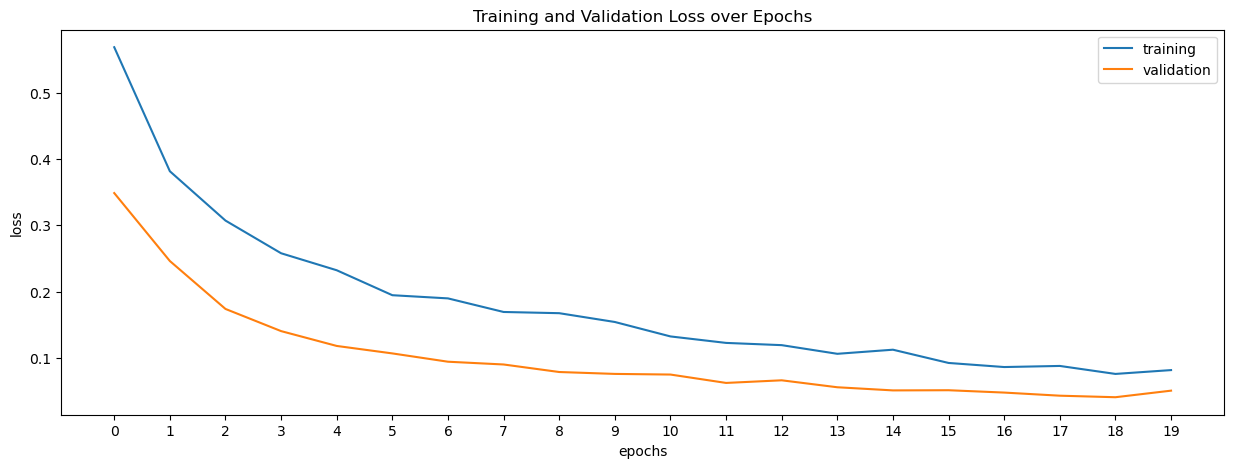

In [22]:
# Plot using matplotlib
plt.figure(0, figsize=(15,5))
plt.plot(train_loss, label="training")
plt.plot(val_loss, label="validation")
plt.xticks(ticks=range(len(val_loss)))
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Training and Validation Loss over Epochs")
plt.legend()
plt.show()

**(c) Plot training and validation accuracy.**

Now let's plot the accuracy. Same requirements as above.

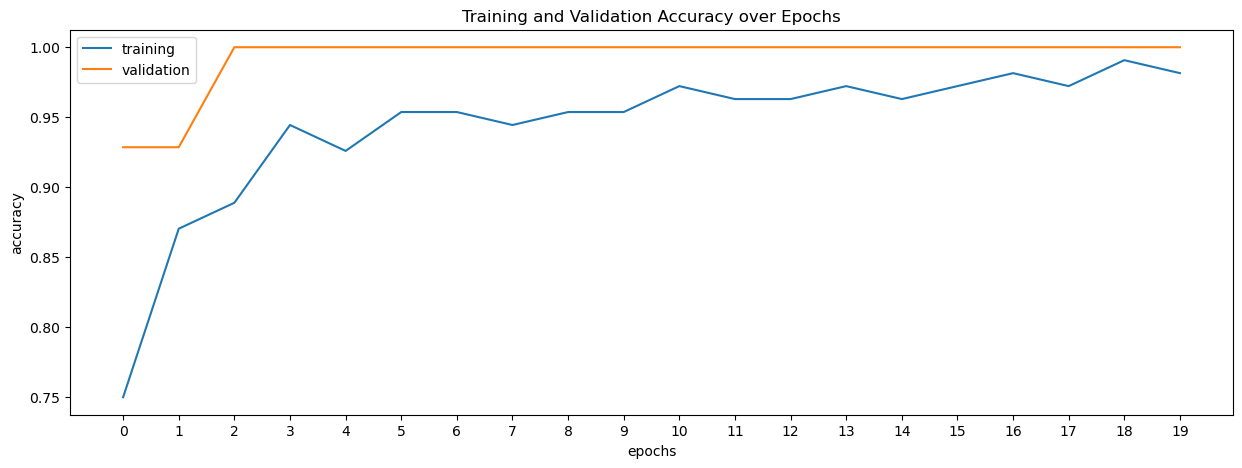

In [23]:
# Plot using matplotlib
plt.figure(1, figsize=(15, 5))
plt.plot(train_acc, label="training")
plt.plot(val_acc, label="validation")
plt.xticks(ticks=range(len(val_acc)))
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Training and Validation Accuracy over Epochs")
plt.legend()
plt.show()

**(d) Visualize predictions.**

On top of all the loss and accuracy numbers, you may also wonder what exactly the MLP is trying to predict for each input. Here we visualize 5 predictions from the test set along with its groundtruths and input images for the Shallow MLP model (ie. the feature maps).

You should use **subplots** to visualize the images, and use an appropriate way to indicate the groudtruth and predicted label for each image.

Predicting: 0it [00:00, ?it/s]

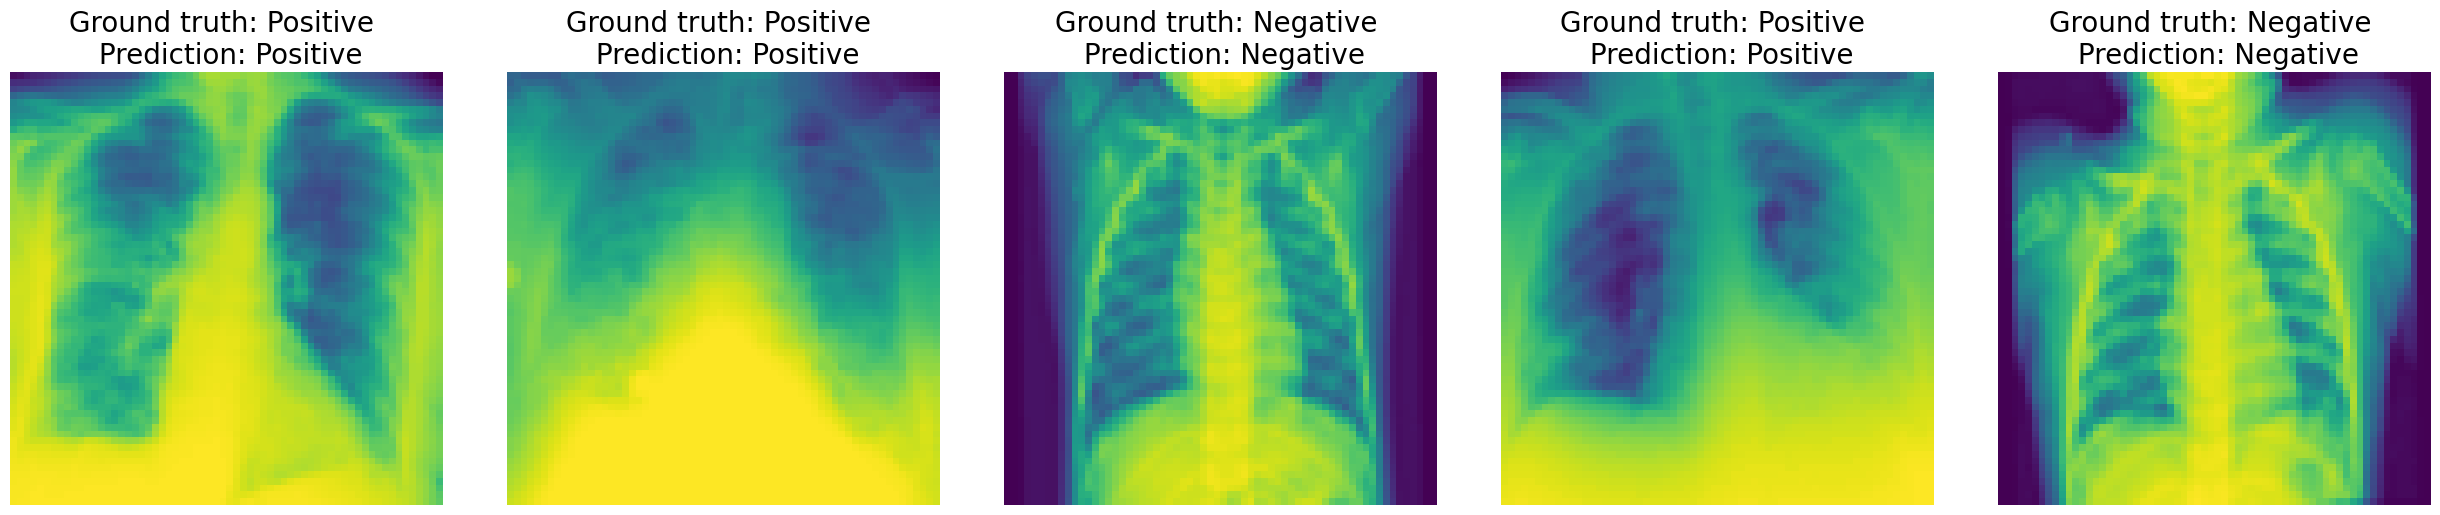

In [36]:
# Generate predictions using the predict method within the trainer
outputs = task1_trainer.predict(task1_model, testloader)
predictions_task1, labels_task1, features_task1, inputs_task1 = outputs[0]

# Visualize predictions along with ground truths and input images using matplotlib
# You will need to write your own code to visualize the prediction
# You may need to move your variables to cpu
label_list = [
    "Negative",
    "Positive"
]


# Make your subplots
# It is recommended to have the ground truth and prediction within the title for each image
# You only need to select 5 images
num_images = 5
image_list = inputs_task1[:num_images]

num_cols = 5
num_rows = 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols*5, 5*num_rows))
for i in range(num_images):
    ax = axes[i]
    ax.axis("off")
    ax.imshow(image_list[i, 0])
    title_text = f"Ground truth: {label_list[labels_task1[i]]} \n Prediction: {label_list[predictions_task1[i]]}"
    ax.set_title(title_text, fontsize = 20)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">

## 2.2 Confusion Matrix <a class="anchor" id="2_2"></a>

### Introduction to Confusion matrix

Now let's do something new!

We'll begin by defining a function to generate a confusion matrix for the model that exhibits the highest test accuracy. Additionally, we'll calculate recall and precision values based on the outcomes of the confusion matrix. Take a look at the subsequent table, which illustrates a two-class confusion matrix.

<center><img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*uR09zTlPgIj5PvMYJZScVg.png" width="600" height="300" /></center>


But first, what exactly is a confusion matrix? In the realm of machine learning, a confusion matrix stands as a fundamental tool used to evaluate the performance of a classification model. It provides an organized tabular representation of the model's predictions, classifying them into four crucial categories: true positives, true negatives, false positives, and false negatives.

To elaborate:
- **True Positives (TP):** These instances denote correct positive class predictions.
- **True Negatives (TN):** These represent accurate negative class predictions.
- **False Positives (FP):** This pertains to cases where the model inaccurately predicts a positive class as negative.
- **False Negatives (FN):** These occur when the model incorrectly predicts a negative class as positive.
    
By visually summarizing these prediction outcomes, the confusion matrix empowers practitioners to derive an array of performance metrics—such as accuracy, precision, recall, and F1-score—that delve into the model's strengths and limitations across distinct classes. This, in turn, aids in assessing and refining the model's predictive prowess. Further insights into confusion matrices can also be found in the workshop notebook.

Now let's define our own function to produce the confusion matrix.

Here in this task we ask you to write the function from scratch, to give you a taste of what it is involved. In Task 3 we will ask you to use predefined functions from torchmetrics to generate it. **While constructing the confusion matrix, please follow exactly the matrix structure given in the figure above.**

In [25]:
# Define the confusion matrix 
# You do not need to normalize your confusion matrix.

def calculate_confusion_matrix(predicted, true, num_classes):
    # Get your predictions
    predicted = predicted

    # Get the groudtruth
    true = true
    
    # Initialize your matrix with zeros
    confusion_matrix = np.zeros((num_classes, num_classes))
    
    # Update the count for each cell in your matrix
    num_items = len(predicted)
    for i in range(num_items):
        confusion_matrix[predicted[i], true[i]] += 1
    
    return confusion_matrix

Next from the MLP you trained in Task 1, load relevant values into the matrix.

In [26]:
# Set the model to evaluation mode
task1_model.eval()

# Collect predictions and true labels
all_predictions = []
all_labels = []

# Disable gradient calculation during evaluation with torch_no_grad()
# Iterate over the entire test dataset and make predictions
with torch.no_grad():
    for batch in testloader:
        x, y, _ = batch
        logits = task1_model(x)
        preds = logits.argmax(1)
        all_predictions.append(preds)
        all_labels.append(y)

# Convert lists to tensors
all_predictions = torch.cat(all_predictions)
all_labels = torch.cat(all_labels)

# Define the number of classes and compute the confusion matrix
num_classes = 2
conf_matrix = calculate_confusion_matrix(all_predictions, all_labels, num_classes)

# print the results
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[20.  1.]
 [ 0. 19.]]


**Note** Your total samples in the confusion matrix should sum up to 40.

Now plot the confusion matrix. A good convention is to use a colour scale to define the values within the confusion matrix. See below for an example of a confusion matrix based on three classes.

<center><img src="https://scikit-learn.org/0.18/_images/sphx_glr_plot_confusion_matrix_001.png" width="400" height="280" /></center>

Now you will be doing something similar, but instead of animals, you will be creating a confusion matrix that shows:

- True and predicted labels
- For positive (COVID-19) and negative (normal) classes


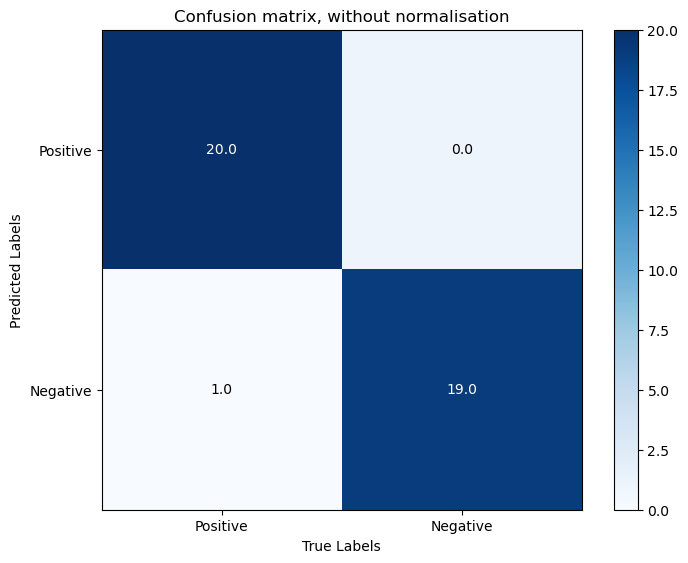

In [33]:
# Define your plot function here
def plot_binary_confusion_matrix(conf_matrix):
    fig = plt.figure()
    axes = fig.add_axes([0,0,1,1])
    plt.imshow(conf_matrix, cmap="Blues")
    plt.colorbar()
    # add text
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            value = conf_matrix[i, j]
            if value > 10:
                color = "w"
            else:
                color = "k"
            plt.text(i,j,value,ha='center',va='center', color=color)
            
    plt.xlabel("True Labels")
    plt.ylabel("Predicted Labels")
    plt.title("Confusion matrix, without normalisation")
    # label the ticks
    axes.set_xticks([0, 1])
    axes.set_xticklabels(['Positive', 'Negative'])
    axes.set_yticks([0, 1])
    axes.set_yticklabels(['Positive', 'Negative'])

# Plot the binary confusion matrix
plot_binary_confusion_matrix(conf_matrix)

<div class="alert alert-block alert-success">

### Answer the following questions:

1. From the training and validation plots of 2.1b) and 2.1c), what do you observe and why do you think the plot would look like this? Please discuss **at least** two points and elaborate on your reasoning.

2. Comment on the findings in the confusion matrix and express your answer so it shows your understanding of the underlying meaning  with respect to the medical X-ray images. Do you think it is good enough? Why or why not? 

Answer: 

1. The loss plots show asymptotically decaying graphs, while the accuracy plots show asymptitically growing graphs. This is due to the model learning very fast at the start, picking up on the easy features; however as the epochs go on, in order to improve further, the model has to extract more complex information, which makes the improvement rate slow down. It could also be a feature of the gradient descent, where the closer a model is to optimal, the slower it is at adjusting the weights. Additionally, the graphs reveal that the validation performance is consistently better than the training performance. This could be due to the small size of the datasets; the training set contains samples that contain cases that are not captured by the validation set, resulting in the training set being more difficult to replicate than the small validation set.

2. From the confusion matrix it appears the model has a recall of 20/(20+1) = 0.9524, and a precision of 20/(20+0) = 1. This means that when faced with positive patients, the model can recognise that the patient is positive for 95.24% of the time; when the model claims a patient is positive, the patient is actually positive 100% of the time. While the precision is perfect, the recall is more important for disease control of potentially life threatening illnesses. 95% means that out of every 1 million people with the illness, 50 thousand people's illness will go unnoticed.

<div class="alert alert-block alert-danger">

#### Congratulations on finishing the first notebook for lab 3. You can now complete the second part of lab 3 where you will train another MLP on a multi-class dataset. You will also be analysing the results. 